# San Francisco - Registered Business Locations

In [89]:
import numpy as np
import pandas as pd
import datetime as dt

In [26]:
registered_businesses = pd.read_csv('Registered_Business_Locations_-_San_Francisco.csv')

In [69]:
registered_businesses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250047 entries, 0 to 250046
Data columns (total 26 columns):
Location Id                            250047 non-null object
Business Account Number                250047 non-null int64
Ownership Name                         250047 non-null object
DBA Name                               250047 non-null object
Street Address                         250043 non-null object
City                                   249856 non-null object
State                                  249431 non-null object
Source Zipcode                         249782 non-null float64
Business Start Date                    250047 non-null object
Business End Date                      100363 non-null object
Location Start Date                    250047 non-null object
Location End Date                      125102 non-null object
Mail Address                           14639 non-null object
Mail City                              149654 non-null object
Mail Zipcode          

## Narrow list down to 'Food Services'

In [260]:
#Keep only 'Food Services' businesses for Restaurant List
restaurants = registered_businesses.loc[registered_businesses['NAICS Code Description'] == 'Food Services']
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12768 entries, 15 to 250025
Data columns (total 26 columns):
Location Id                            12768 non-null object
Business Account Number                12768 non-null int64
Ownership Name                         12768 non-null object
DBA Name                               12768 non-null object
Street Address                         12768 non-null object
City                                   12768 non-null object
State                                  12764 non-null object
Source Zipcode                         12685 non-null float64
Business Start Date                    12768 non-null object
Business End Date                      3128 non-null object
Location Start Date                    12768 non-null object
Location End Date                      4818 non-null object
Mail Address                           1319 non-null object
Mail City                              9640 non-null object
Mail Zipcode                           

In [261]:
#Keep only select columns of "Restaurants"
restaurants = restaurants[['DBA Name', 'Street Address', 
                           'City', 'State', 'Source Zipcode', 
                           'Business Start Date', 'Business End Date']]

#Drop entries without a 'Source Zipcode' --> will need Zipcode for matching additional data
restaurants.dropna(subset=['Source Zipcode'], inplace=True)

In [262]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12685 entries, 15 to 250025
Data columns (total 7 columns):
DBA Name               12685 non-null object
Street Address         12685 non-null object
City                   12685 non-null object
State                  12684 non-null object
Source Zipcode         12685 non-null float64
Business Start Date    12685 non-null object
Business End Date      3122 non-null object
dtypes: float64(1), object(6)
memory usage: 792.8+ KB


## Ensure restaurant located in San Francisco, CA

In [263]:
# Keep only entries with 'State' == 'CA'
restaurants = restaurants.loc[restaurants['State'] == 'CA']

In [264]:
# Decide to ignore all entries for the ballpark (not really representative of what I'm looking for)

In [265]:
# Write function to correct all misspellings of "San Francisco"
def fix_city_names(city):
    '''
    Correct all misspellings of "San Francisco" in 'City' column
    '''
    list_of_misspellings = ['Sa Francisco', 'San', 'San  Francisco', 
                            'San Fancisco', 'San Farancisco', 
                            'San Fracisco', 'San Fracnisco', 
                            'San Francico', 'San Francicsco', 
                            'San Francicso', 'San Francis', 
                            'San Francisc', 'San Francisc0', 
                            'San Francisci', 'San Franciscio', 
                            'San Franciscoq', 'San Franciso', 
                            'San Francisoc', 'San Francsico', 
                            'San Francsisco', 'San Franicsco', 
                            'San Franisco', 'San Fransico', 
                            'San Fransisco', 'San Frascisco', 
                            'San Frnacisco', 'Sanfrancisco', 
                            'Sanfrancisoc', 'Sf', 
                            'Sn Francisco']
    
    if city in list_of_misspellings:
        return 'San Francisco'
    else:
        return city

In [266]:
restaurants['City'] = restaurants['City'].apply(fix_city_names)

In [267]:
# Keep only city listed as 'San Francisco'
restaurants = restaurants.loc[restaurants['City'] == 'San Francisco']

In [268]:
# Drop 'City' and 'State' columns now that they've been standardized
restaurants.drop(columns=['City', 'State'], inplace=True)

In [269]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 15 to 250025
Data columns (total 5 columns):
DBA Name               11848 non-null object
Street Address         11848 non-null object
Source Zipcode         11848 non-null float64
Business Start Date    11848 non-null object
Business End Date      2902 non-null object
dtypes: float64(1), object(4)
memory usage: 555.4+ KB


## Convert dates from strings to datetime objects

In [270]:
# Convert 'Business Start Date' and 'Business End Date' to datetime objects
restaurants['Business Start Date'] = pd.to_datetime(restaurants['Business Start Date'], format='%m/%d/%Y')
restaurants['Business End Date'] = pd.to_datetime(restaurants['Business End Date'], format='%m/%d/%Y')

## Add 'Years Open' column

In [271]:
# Create column 'Years Open' for length of time restaurant was/has been in business

#Closed restaurants:
restaurants.loc[restaurants['Business End Date'].notnull(), 'Years Open'] = (
    (restaurants['Business End Date'] - restaurants['Business Start Date']).dt.days)/365

#Restaurants still in business:
restaurants.loc[restaurants['Business End Date'].isnull(), 'Years Open'] = (
    (pd.to_datetime('today') - restaurants['Business Start Date']).dt.days)/365

In [272]:
##### Will drop out when modeling
# Create column for year opened
restaurants['Year Opened'] = (restaurants['Business Start Date']).dt.year

# Create column for month opened
restaurants['Month Opened'] = (restaurants['Business Start Date']).dt.month

# Create column for year closed
restaurants['Year Closed'] = restaurants['Business End Date'].dt.year

In [273]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11848 entries, 15 to 250025
Data columns (total 9 columns):
DBA Name               11848 non-null object
Street Address         11848 non-null object
Source Zipcode         11848 non-null float64
Business Start Date    11848 non-null datetime64[ns]
Business End Date      2902 non-null datetime64[ns]
Years Open             11848 non-null float64
Year Opened            11848 non-null int64
Month Opened           11848 non-null int64
Year Closed            2902 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 1.2+ MB


# Issue with 'Business End Date' collection

City doesn't seem to have regularly collected 'Business End Date' before March 2015. Since we're only looking at restaurants open at least a year, this means the earliest 'Business Start Date' I can use is 3/1/2014.

In [276]:
#Keep only restaurants opened since 3/1/2014
restaurants = restaurants[restaurants['Business Start Date'] >= ('2014-03-01 00:00:00')]

In [277]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5519 entries, 15 to 250025
Data columns (total 9 columns):
DBA Name               5519 non-null object
Street Address         5519 non-null object
Source Zipcode         5519 non-null float64
Business Start Date    5519 non-null datetime64[ns]
Business End Date      1394 non-null datetime64[ns]
Years Open             5519 non-null float64
Year Opened            5519 non-null int64
Month Opened           5519 non-null int64
Year Closed            1394 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 431.2+ KB


# Define what makes a restaurant a 'Success'

1. Restaurant is still open ('Business End Date' is null)  
2. If Restaurant is still open, it must have been open for at least the past 2 years (narrows purview to restaurants opened before 12/9/2017)

## Narrow restaurant list to those opened on or before 12/9/2017

In [279]:
# Keep only restaurants opened since 2014
restaurants = restaurants[restaurants['Business Start Date'] <= ('2017-12-09 00:00:00')]

### Eliminate extra uncertain data by only looking at restaurants that stayed open for at least 1 year

In [280]:
# Keep only restaurants that stayed open at least 1 year
restaurants = restaurants[restaurants['Years Open'] >= 1]

In [281]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3232 entries, 15 to 249954
Data columns (total 9 columns):
DBA Name               3232 non-null object
Street Address         3232 non-null object
Source Zipcode         3232 non-null float64
Business Start Date    3232 non-null datetime64[ns]
Business End Date      783 non-null datetime64[ns]
Years Open             3232 non-null float64
Year Opened            3232 non-null int64
Month Opened           3232 non-null int64
Year Closed            783 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 252.5+ KB


### Start to address issue of corporate vendors in list. Want to whittle list down to actual restaurants.

In [284]:
# Need to remove all 'DBA Name' with 'Aramark' and 'Guckenheimer' in the title 
#  --> corporate catering, not restaurants
restaurants = restaurants.loc[~restaurants['DBA Name'].str.contains('Aramark')]
restaurants = restaurants.loc[~restaurants['DBA Name'].str.contains('Guckenheimer')]

### Others???

#Not actually a problem since time range was narrowed

In [285]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 15 to 249954
Data columns (total 9 columns):
DBA Name               3231 non-null object
Street Address         3231 non-null object
Source Zipcode         3231 non-null float64
Business Start Date    3231 non-null datetime64[ns]
Business End Date      782 non-null datetime64[ns]
Years Open             3231 non-null float64
Year Opened            3231 non-null int64
Month Opened           3231 non-null int64
Year Closed            782 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 252.4+ KB


### Remove duplicate entries?

In [287]:
## Looked like duplicates might be an issue in an earlier iteration, unclear if it still is

## Now that 'Success' is defined and the range for determining it has been established, need to classify each entry

In [300]:
# 'Success' == 1 if 'Business End Date'.isnull() AND 'Years Open' >= 1. Else: 'Success' == 0

def define_success(end_date, years_open):
    '''
    Classify entries in 'Restaurants' df
    '''
    if end_date is pd.NaT:
        if years_open >= 2:
            return 1
        else:
            return 0
    else:
        return 0

In [301]:
restaurants['Success'] = restaurants.apply(
    lambda x: define_success(x['Business End Date'], x['Years Open']), axis=1)

In [317]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3231 entries, 15 to 249954
Data columns (total 10 columns):
DBA Name               3231 non-null object
Street Address         3231 non-null object
Source Zipcode         3231 non-null float64
Business Start Date    3231 non-null datetime64[ns]
Business End Date      782 non-null datetime64[ns]
Years Open             3231 non-null float64
Year Opened            3231 non-null int64
Month Opened           3231 non-null int64
Year Closed            782 non-null float64
Success                3231 non-null int64
dtypes: datetime64[ns](2), float64(3), int64(3), object(2)
memory usage: 437.7+ KB


In [316]:
failures = restaurants[restaurants['Success'] == 0]
successes = restaurants[restaurants['Success'] == 1]

In [ ]:
# 2449 successes vs. 782 failures

## Pickle df for use later

In [318]:
#Pickle dataframe
restaurants.to_pickle('./restaurants_df.pkl')

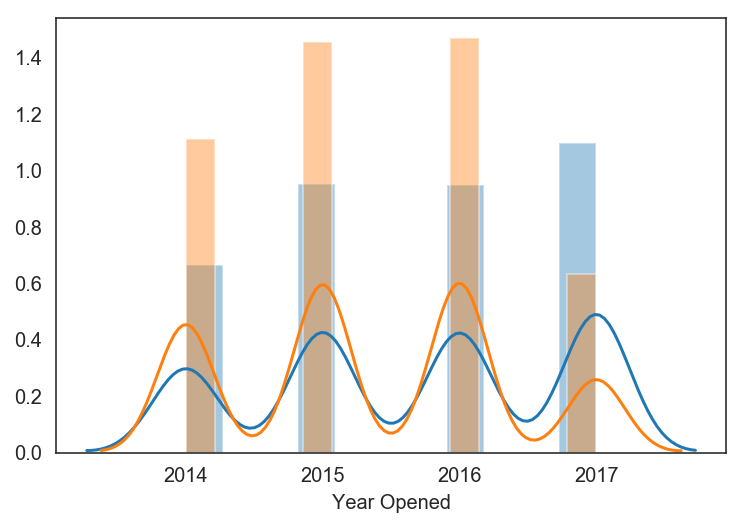

In [314]:
sns.distplot(successes['Year Opened'])
#sns.distplot(failures['Year Opened']);

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: 0.0 cannot be raised to a negative power

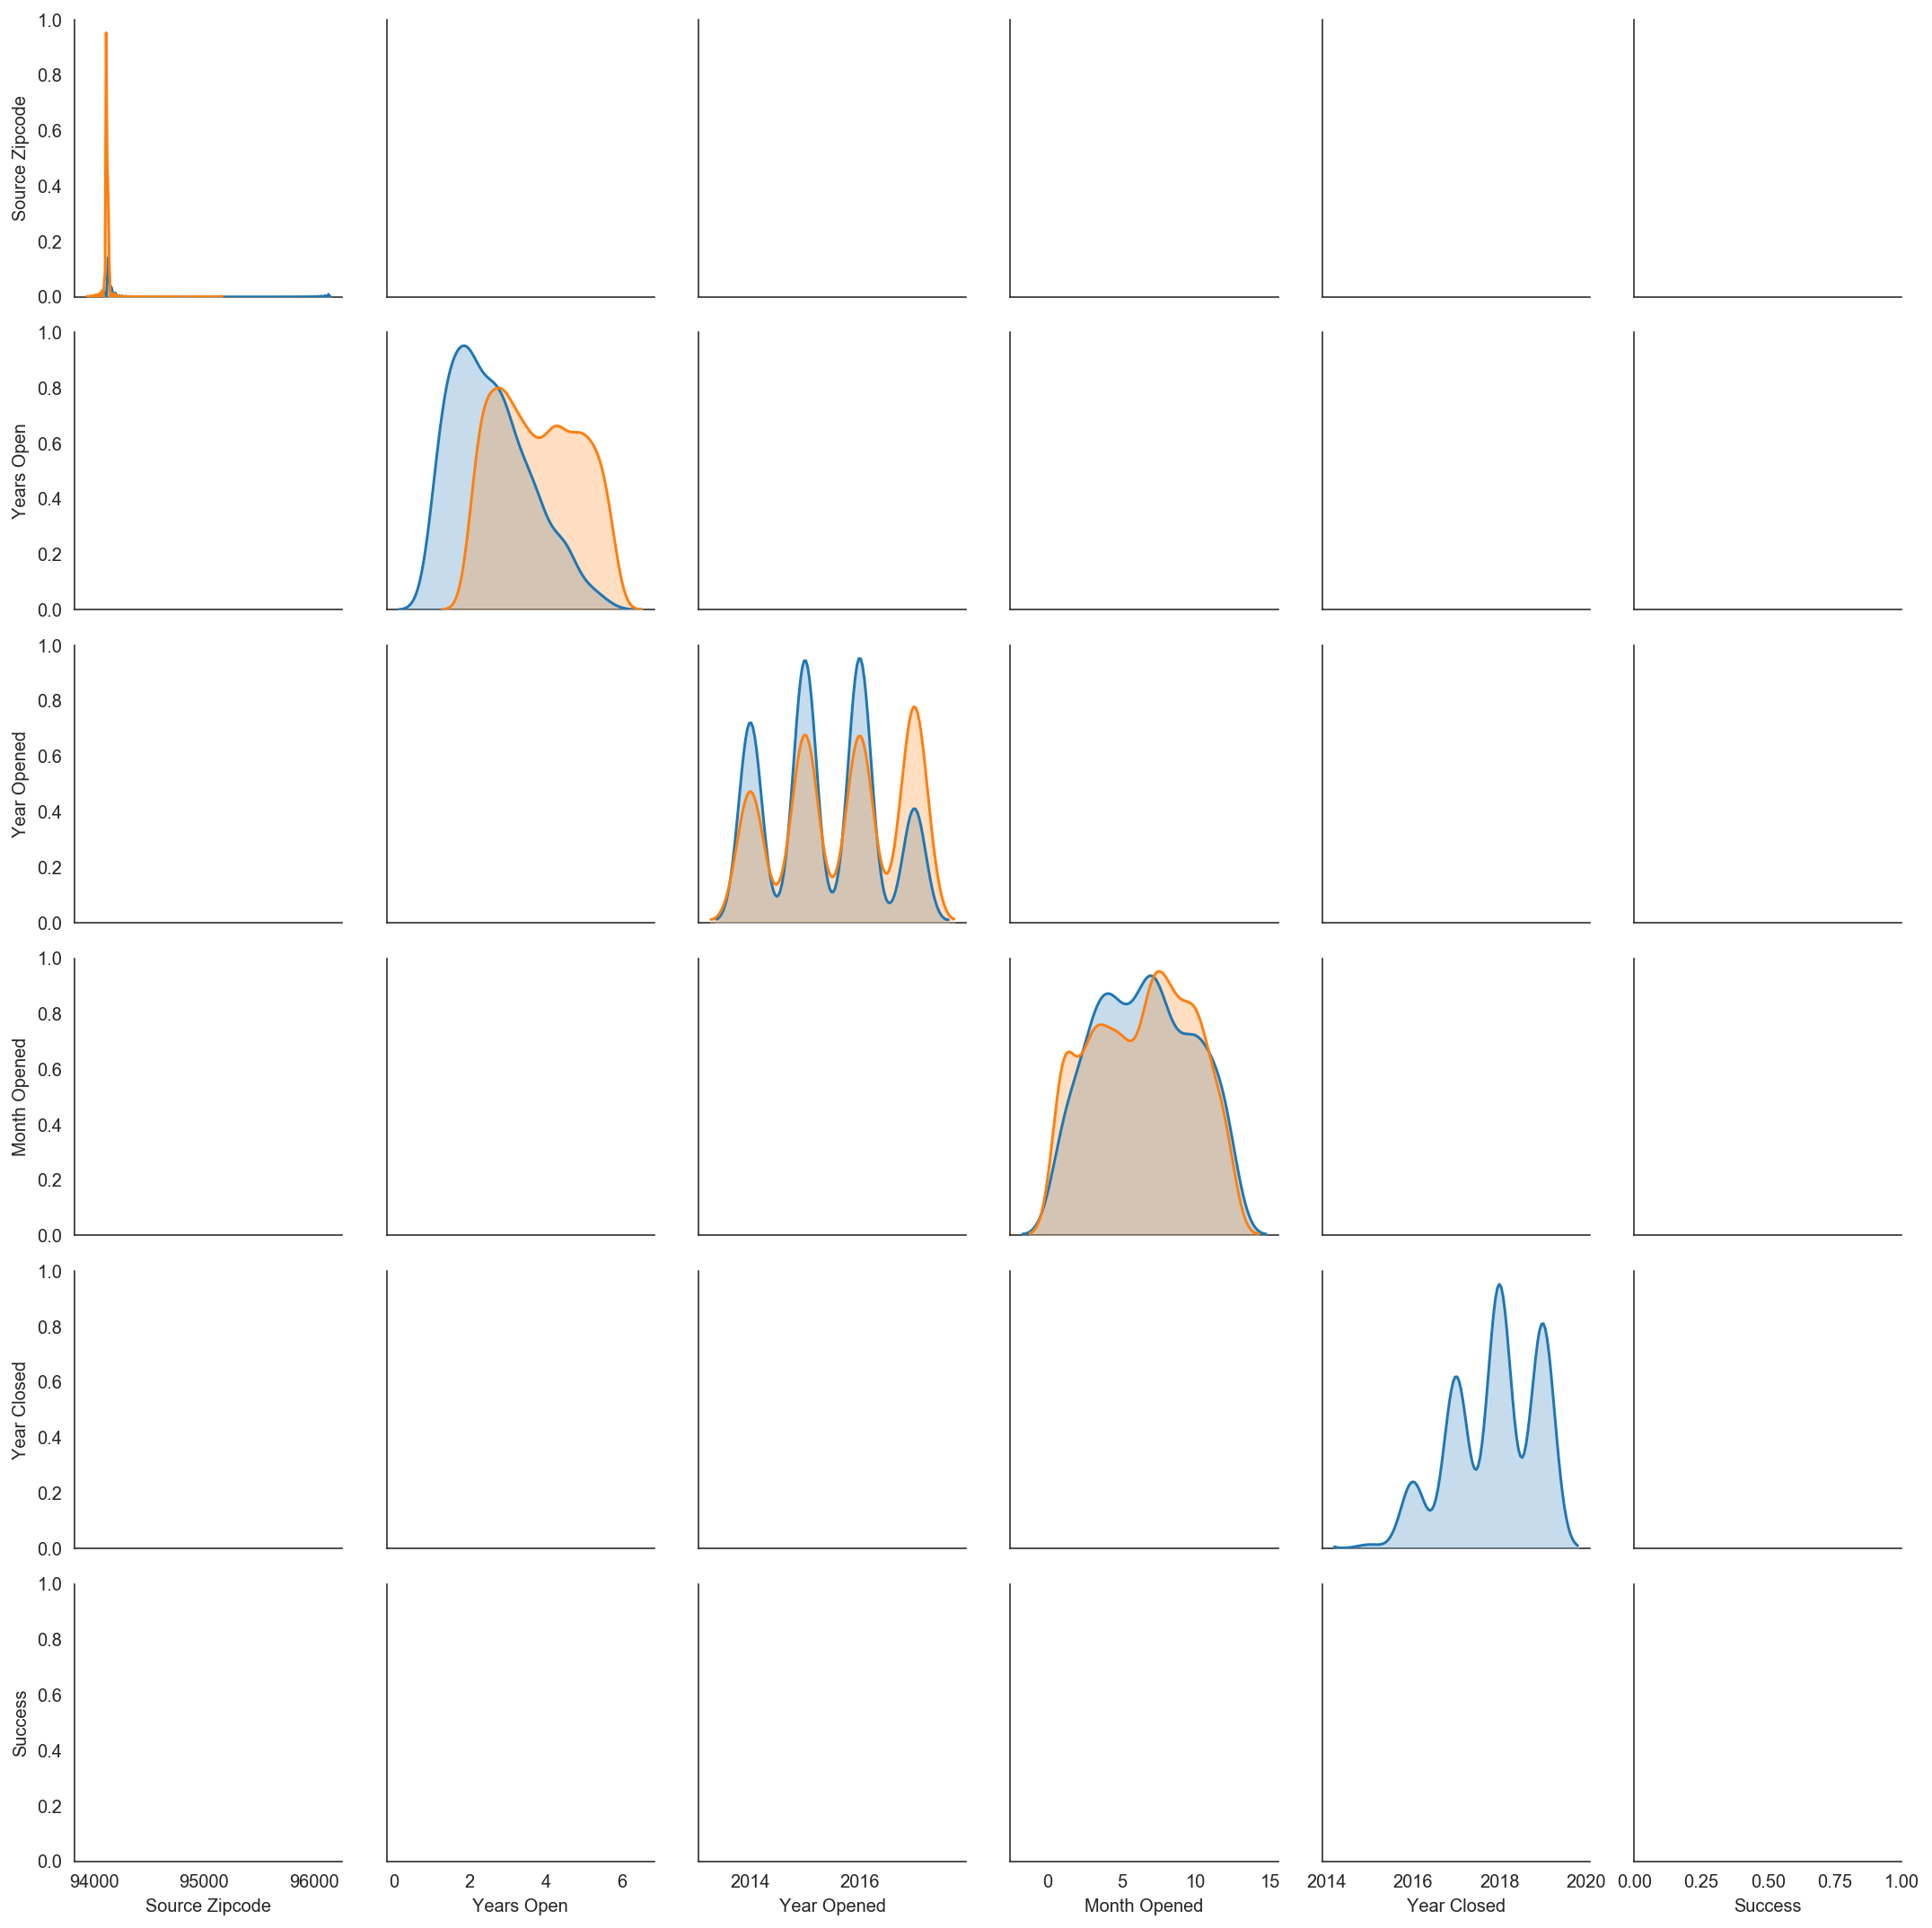

In [315]:
sns.pairplot(restaurants, hue='Success');

In [319]:
# Questions to ask/data to highlight:
# . Best month to open a restaurant?
#   Variation by zipcode --> best area to open a restaurant?
#  All restaurants opened/closed in each year (overlain dist plots)

## Poking around

In [253]:
#Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
%config InlineBackend.figure_formats = ['retina']
sns.set_style("white")

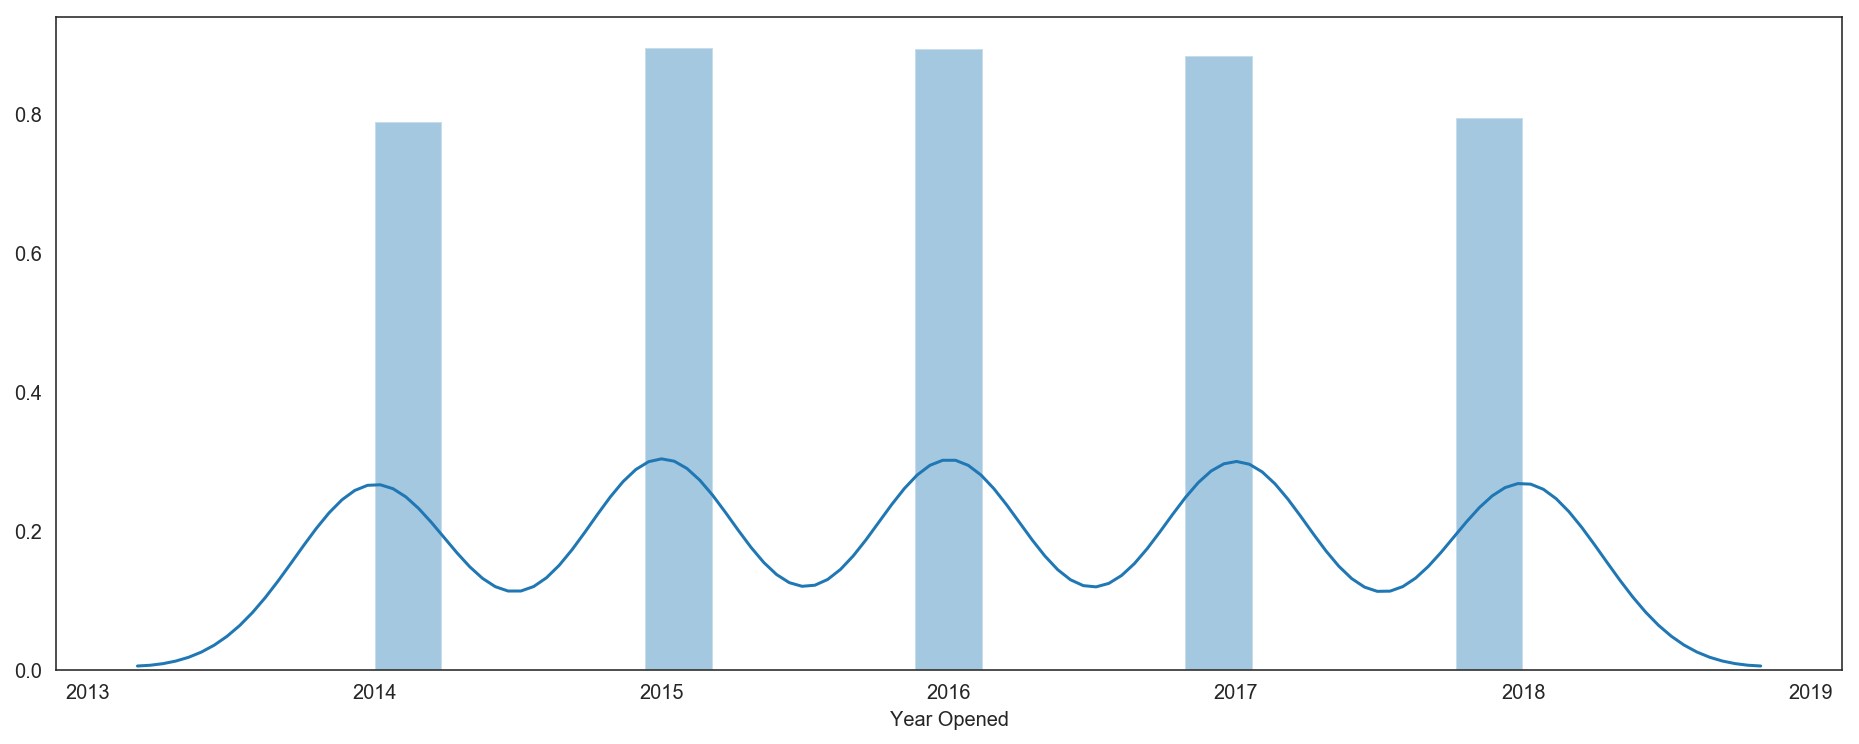

In [254]:
# Plot of restaurant openings over time
plt.figure(figsize=(16, 6))
sns.distplot(restaurants['Year Opened']);

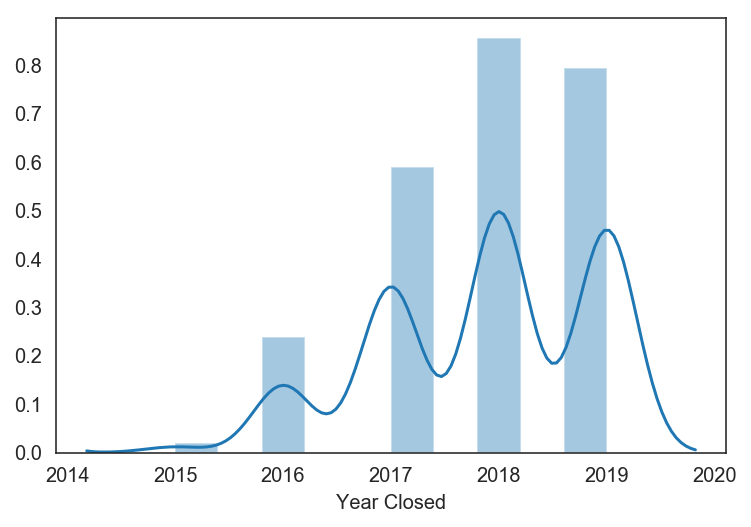

In [255]:
# Plot of restaurant closings over time
closed_restaurants = restaurants.loc[restaurants['Year Closed'].notnull()]


sns.distplot(closed_restaurants['Year Closed']);


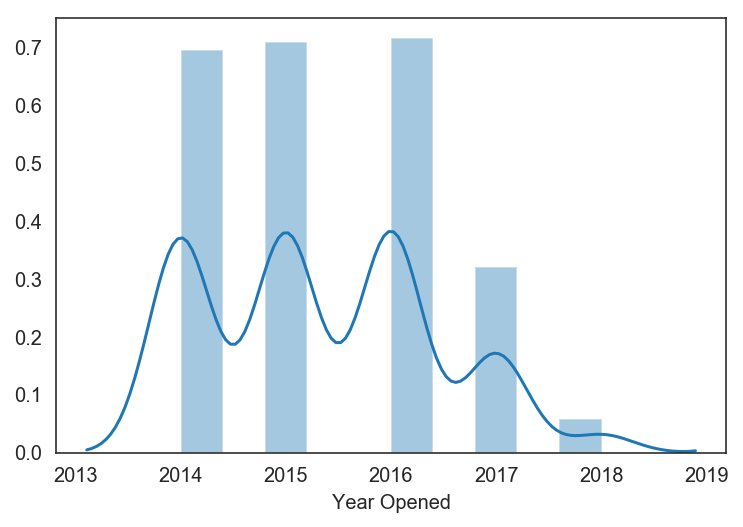

In [256]:
sns.distplot(closed_restaurants['Year Opened'])

In [203]:
# Interesting... Business closures don't really kick in until March 2015.
# Likely a data collection issue. Need to adjust data range accordingly.
set(restaurants['Business End Date'])

{NaT,
 Timestamp('2012-12-31 00:00:00'),
 Timestamp('2014-12-01 00:00:00'),
 Timestamp('2014-12-31 00:00:00'),
 Timestamp('2015-03-02 00:00:00'),
 Timestamp('2015-03-27 00:00:00'),
 Timestamp('2015-05-01 00:00:00'),
 Timestamp('2015-05-29 00:00:00'),
 Timestamp('2015-06-05 00:00:00'),
 Timestamp('2015-06-11 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2015-07-19 00:00:00'),
 Timestamp('2015-08-31 00:00:00'),
 Timestamp('2015-09-04 00:00:00'),
 Timestamp('2015-09-30 00:00:00'),
 Timestamp('2015-10-26 00:00:00'),
 Timestamp('2015-10-31 00:00:00'),
 Timestamp('2015-11-01 00:00:00'),
 Timestamp('2015-11-03 00:00:00'),
 Timestamp('2015-11-06 00:00:00'),
 Timestamp('2015-11-15 00:00:00'),
 Timestamp('2015-11-29 00:00:00'),
 Timestamp('2015-11-30 00:00:00'),
 Timestamp('2015-12-01 00:00:00'),
 Timestamp('2015-12-17 00:00:00'),
 Timestamp('2015-12-22 00:00:00'),
 Timestamp('2015-12-29 00:00:00'),
 Timestamp('2015-12-30 00:00:00'),
 Timestamp('2015-12-31 00:00:00'),
 Timestamp('20

In [ ]:
#Make a histogram for closed restaurants to see the distribution across number of years open
sns.set_style('whitegrid')
sns.set_palette('husl')
sns.set_context('talk')
plt.figure(figsize=(16, 6))
plt.title('Distribution: Time SF Restaurants Last', 
          fontdict={'fontweight': 'bold', 'fontsize': 24}, 
          pad = 10)
sns.distplot(closed_restaurants['Years Open'], 
            color = 'b')
plt.savefig('YearsOpen_dist.png');

In [151]:
#Look into subset of 'Closed Restaurants'
#closed_restaurants = 
#restaurants.loc[restaurants['Business End Date'].notnull()]